In [246]:
#Exploratory Data Analysis

In [312]:


import pandas as pd
import os.path
from os import path
import os
import numpy as np

import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime

print(pd.__version__)

if path.exists('./raw_data.csv'):
    data = pd.read_csv('./raw_data.csv')
    data['hour'] = data['date'].astype('datetime64[ns]').dt.hour
    display(data)
    print (data.size)

1.2.5


,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17
...,...,...,...,...,...,...
15157,eec02ec5,2150.50,-1.60,-1.73,2021-07-03 04:06:57+00:00,4
15158,90791ae9,NaN,NaN,NaN,2021-07-03 04:06:58+00:00,4
15159,49b6c0dd,-0.33,1030.00,2.00,2021-07-03 04:06:58+00:00,4
15160,d0926969,NaN,3477.37,6.95,2021-07-03 04:06:58+00:00,4


90972


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           15162 non-null  object 
 1   battery_power  13298 non-null  float64
 2   site_power     13059 non-null  float64
 3   solar_power    13059 non-null  float64
 4   date           15162 non-null  object 
 5   hour           15162 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 710.8+ KB


In [314]:
data.shape

(15162, 6)

In [315]:
data.head()

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17


In [316]:
data.tail()

,site,battery_power,site_power,solar_power,date,hour
15157,eec02ec5,2150.50,-1.60,-1.73,2021-07-03 04:06:57+00:00,4
15158,90791ae9,NaN,NaN,NaN,2021-07-03 04:06:58+00:00,4
15159,49b6c0dd,-0.33,1030.00,2.00,2021-07-03 04:06:58+00:00,4
15160,d0926969,NaN,3477.37,6.95,2021-07-03 04:06:58+00:00,4
15161,7435e9d3,3869.83,-27.90,1.42,2021-07-03 04:06:59+00:00,4


In [317]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,13298.0,-128.573736,1684.589952,-8055.83,-10.000,0.00,8.670,7915.00
site_power,13059.0,-673.065437,2565.563642,-14290.35,-2049.645,-2.19,285.055,15207.37
solar_power,13059.0,2485.373747,2929.689524,-5043.20,7.470,1774.82,4348.520,16207.38
hour,15162.0,16.888273,7.279194,1.00,18.000,20.00,21.000,23.00


In [318]:
sites = data.site.unique()
print(sites)

['134a3fa6' '8d9fed87' '5688ed10' '2b33a48d' '07333ad0' '38c8ae33'
 'adc42b19' 'e9ba8cec' 'e12c2148' '4b78aae6' 'e724ca65' '135433c1'
 '90606897' '02ebf5c7' 'c8eb2d3d' '2b98cbdd' '39146e59' '55af2f9b'
 '28731623' '3193e230' 'e6bcf7cf' '7da0acb7' 'c18b6195' '20abb173'
 'f34b386a' 'f7f9ac09' '5fc96249' '82c74b9e' 'b255f7ad' '61bff705'
 '619fd2b9' '260f359a' '4faff963' '499a251d' 'dfc6fdf5' '64e1616f'
 '93c8a2c1' 'eec02ec5' '90791ae9' '49b6c0dd' 'd0926969' '7435e9d3']


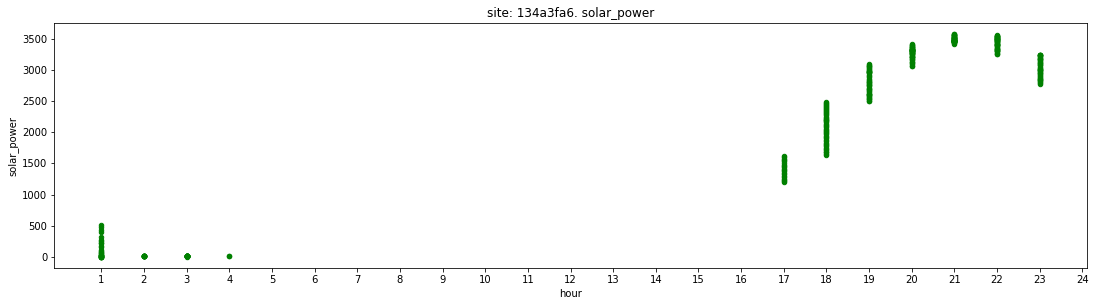

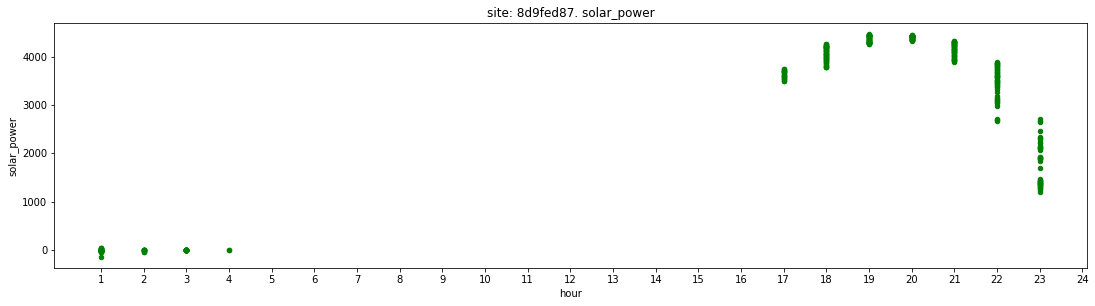

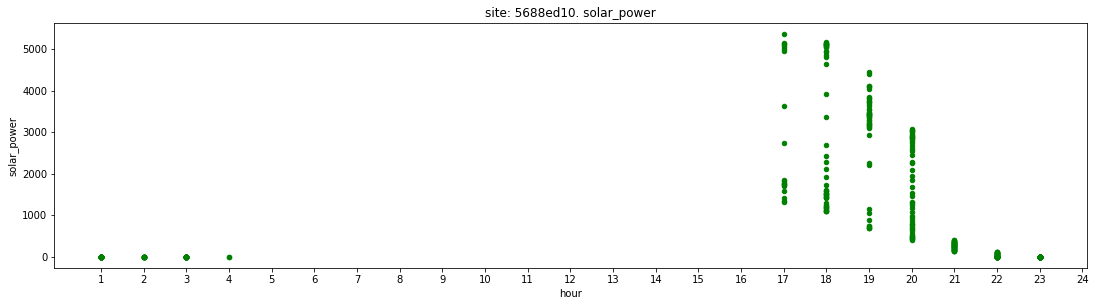

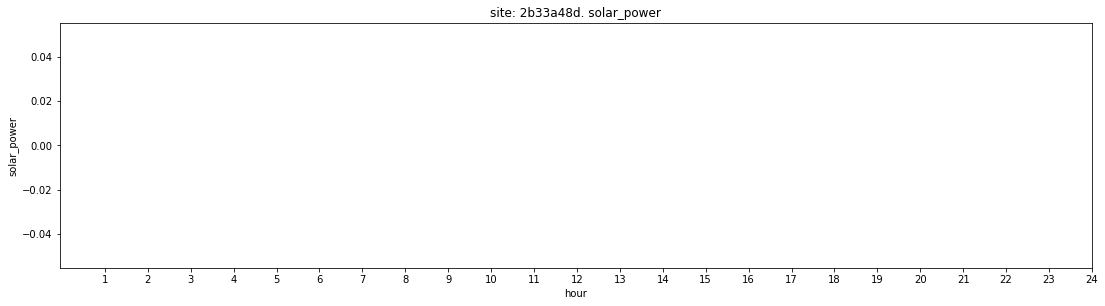

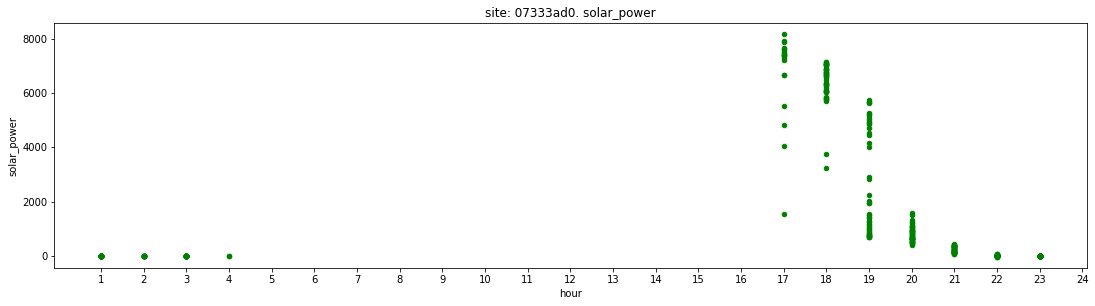

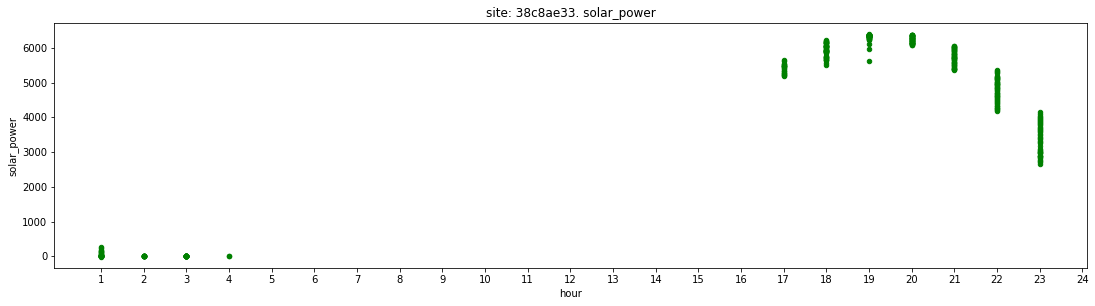

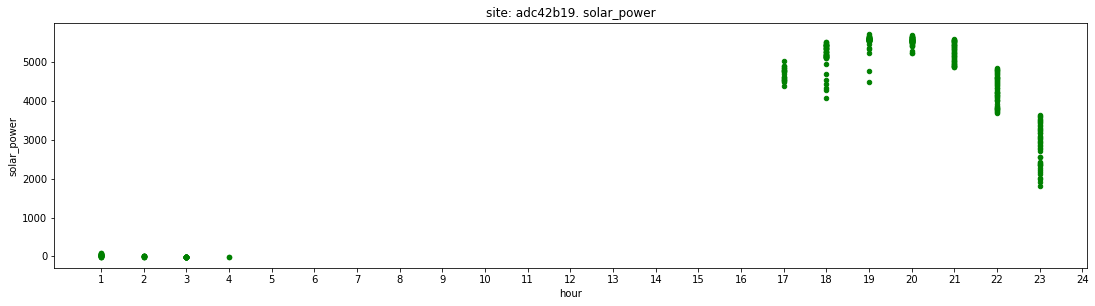

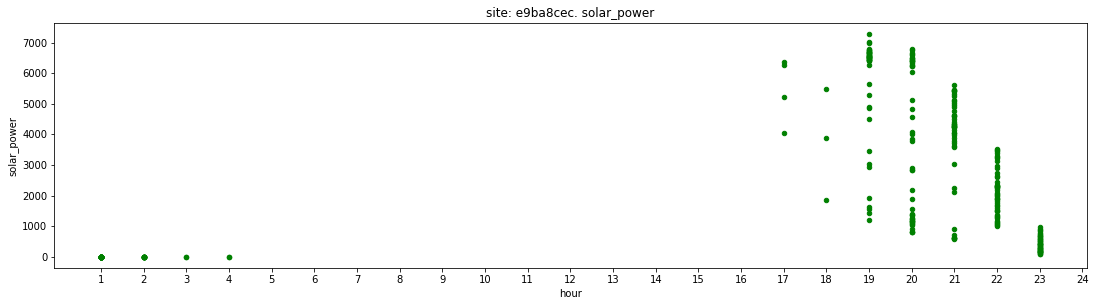

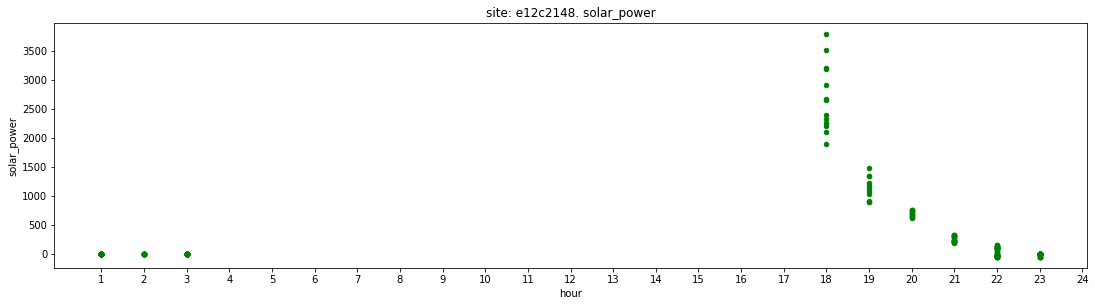

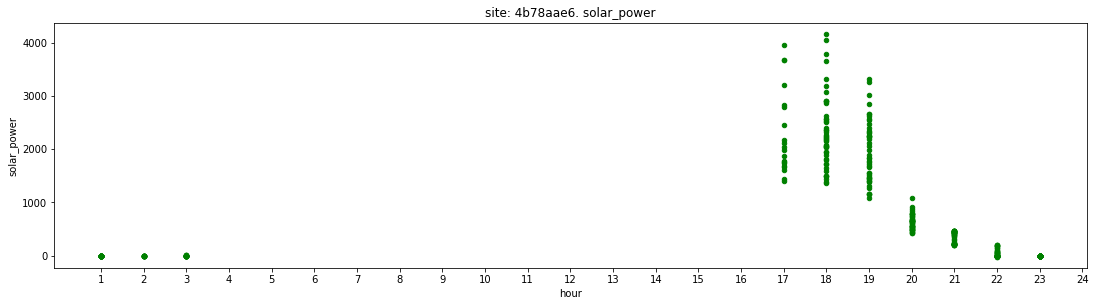

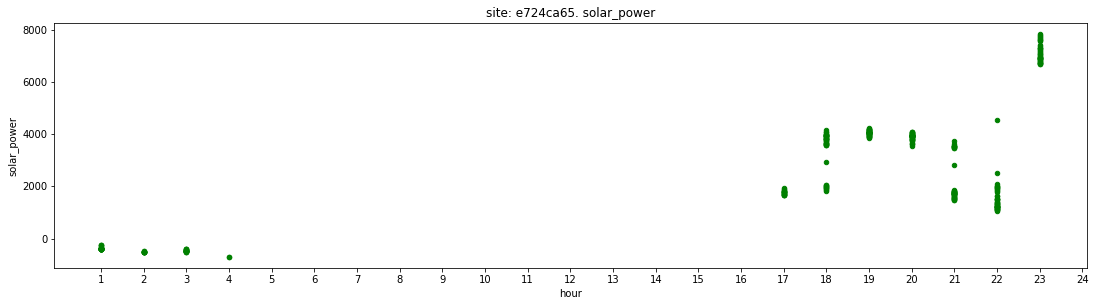

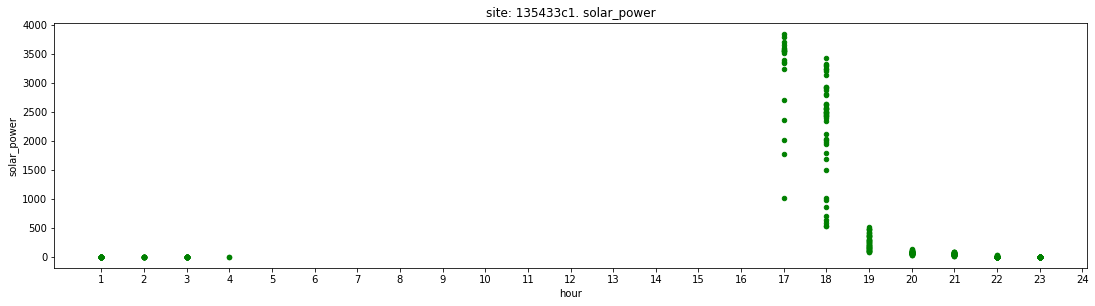

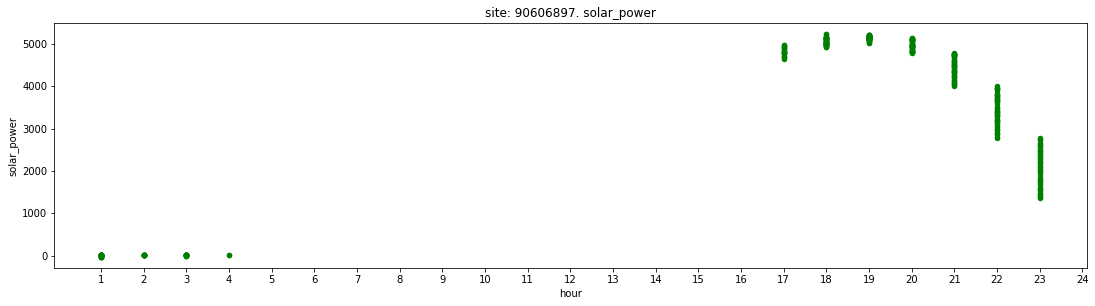

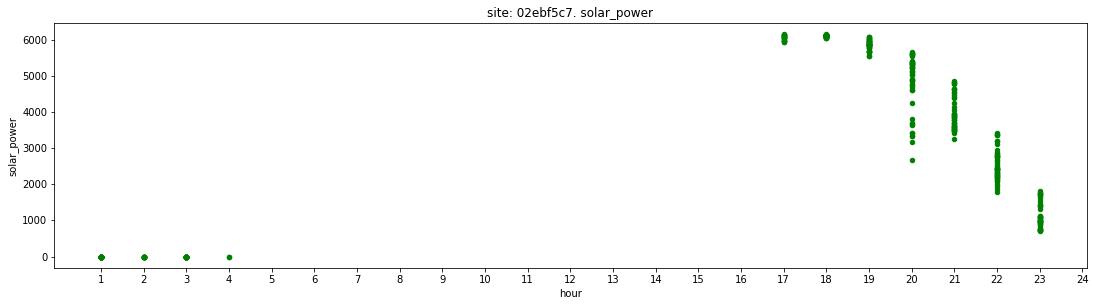

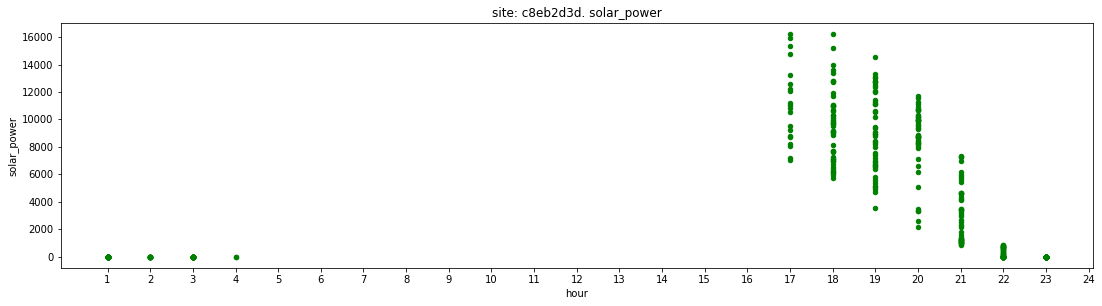

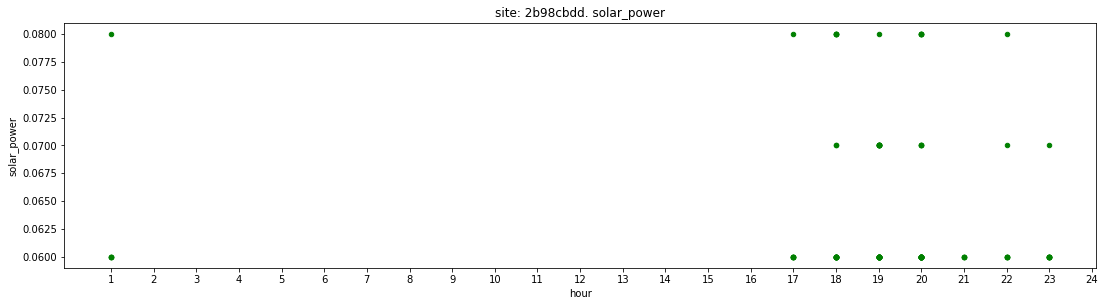

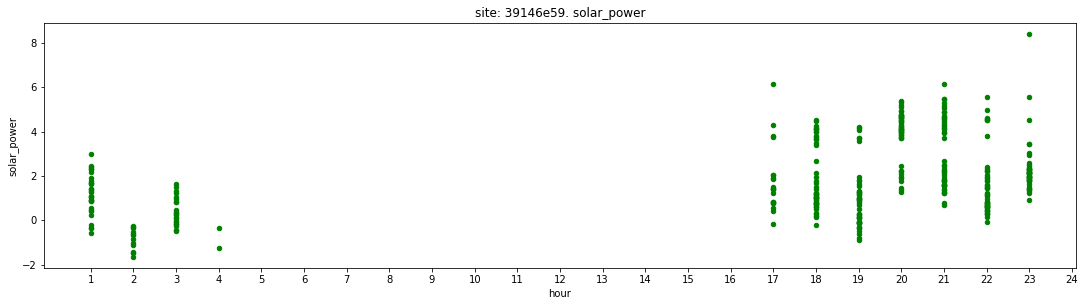

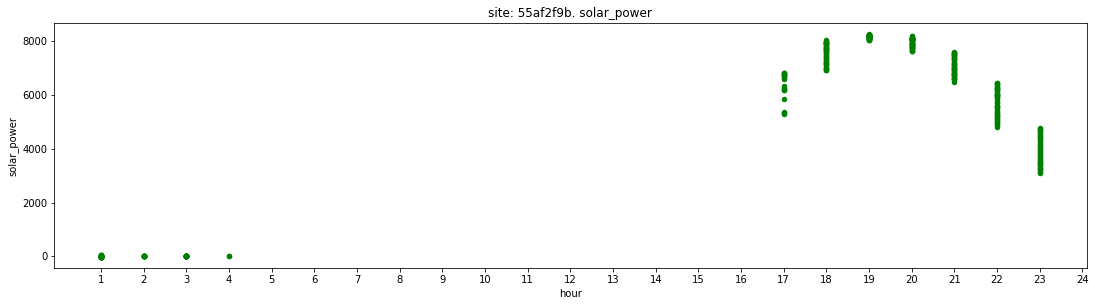

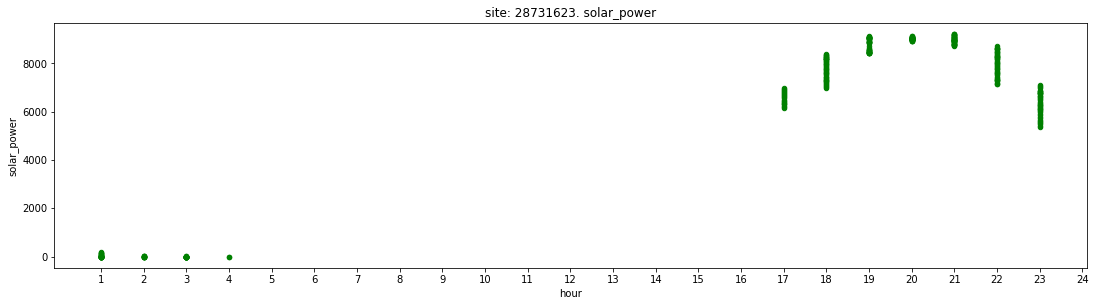

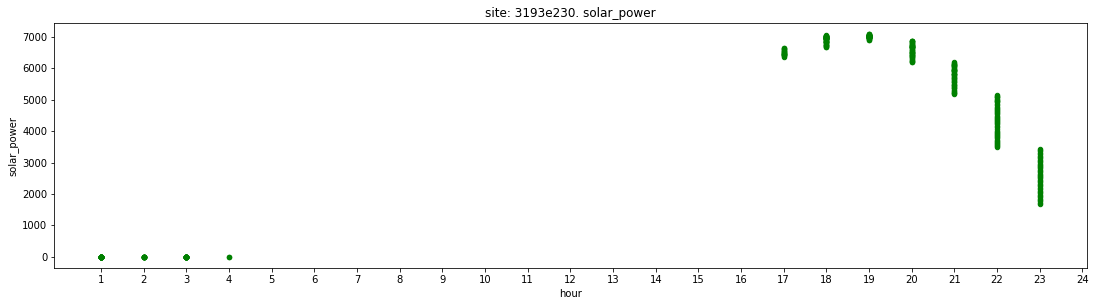

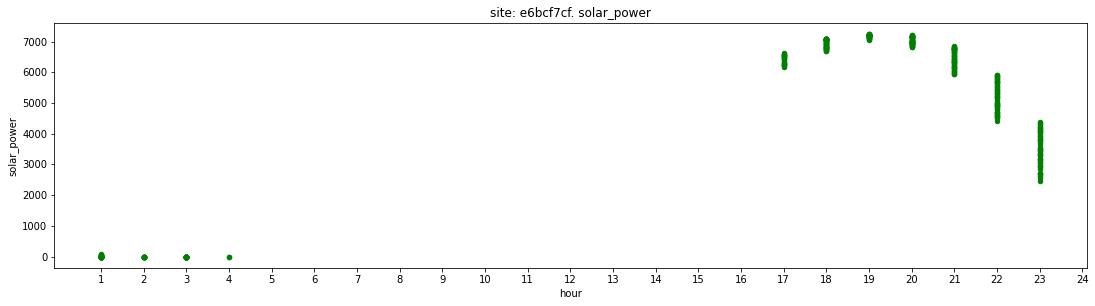

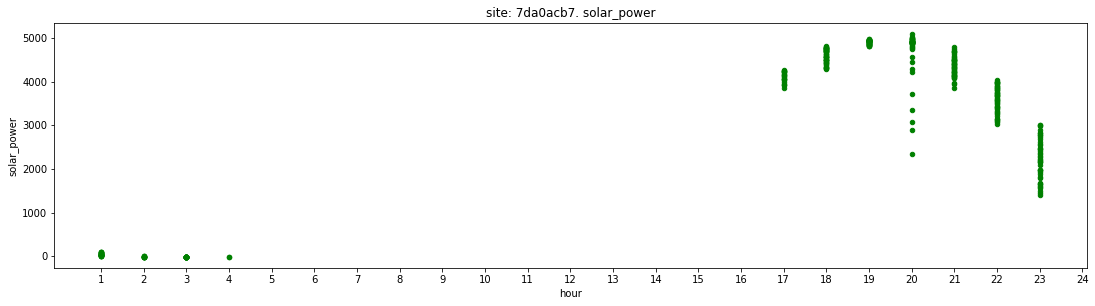

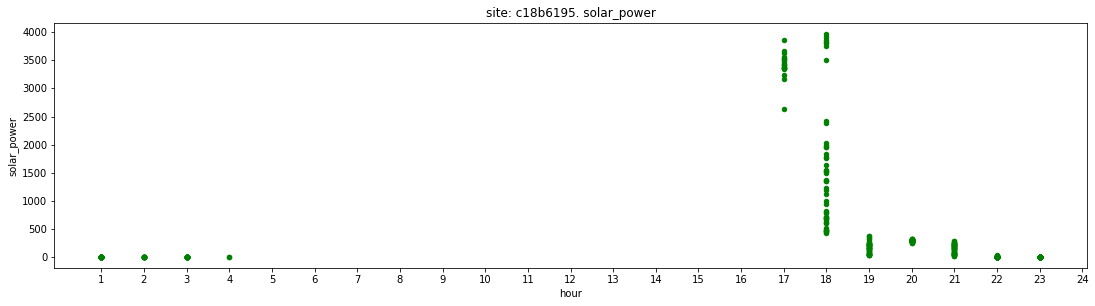

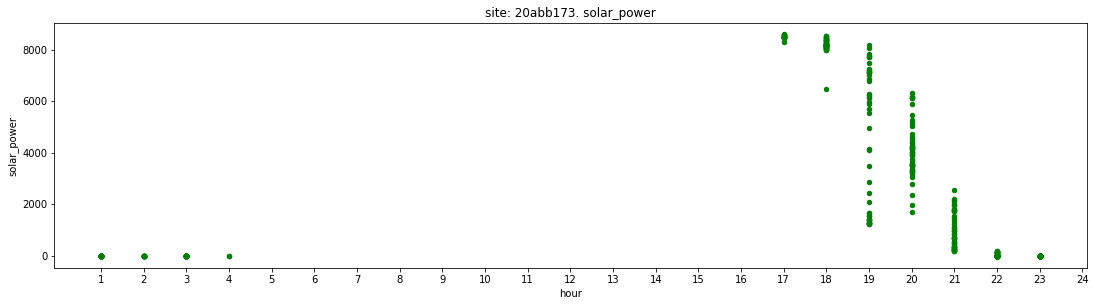

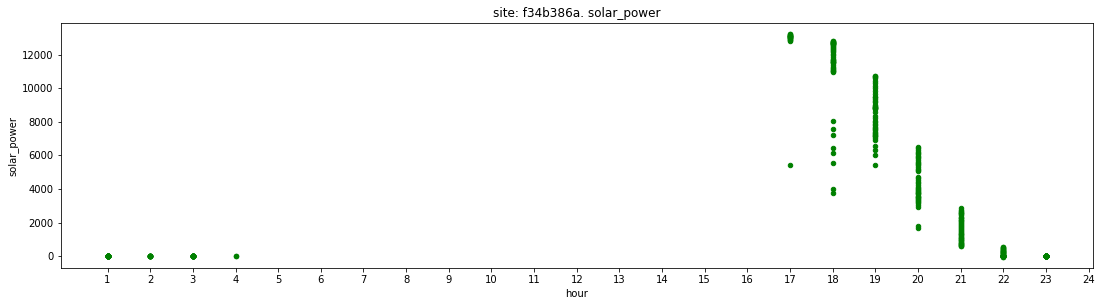

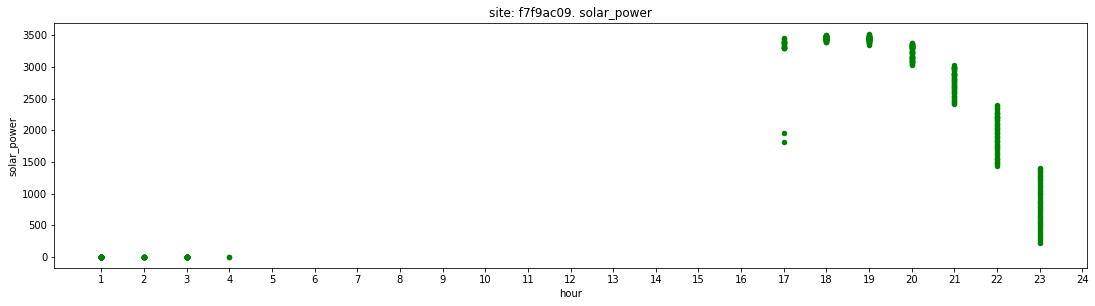

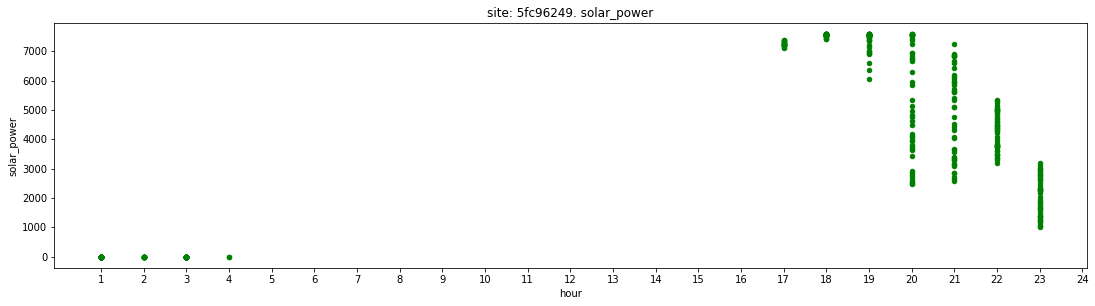

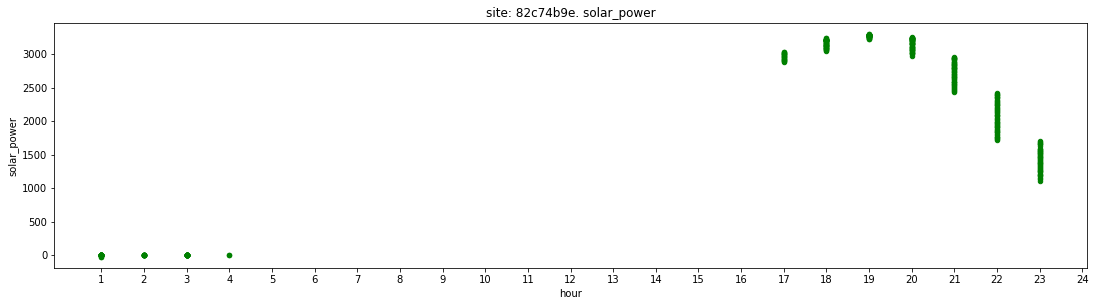

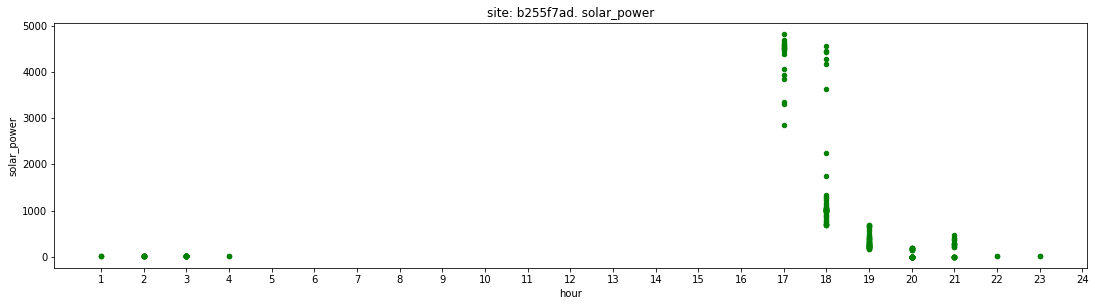

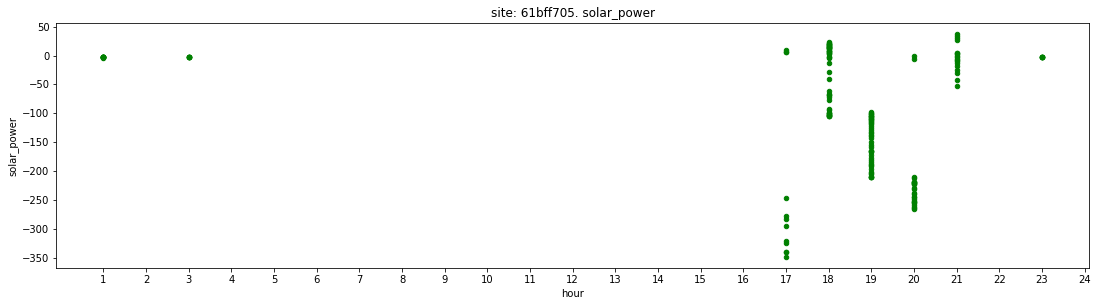

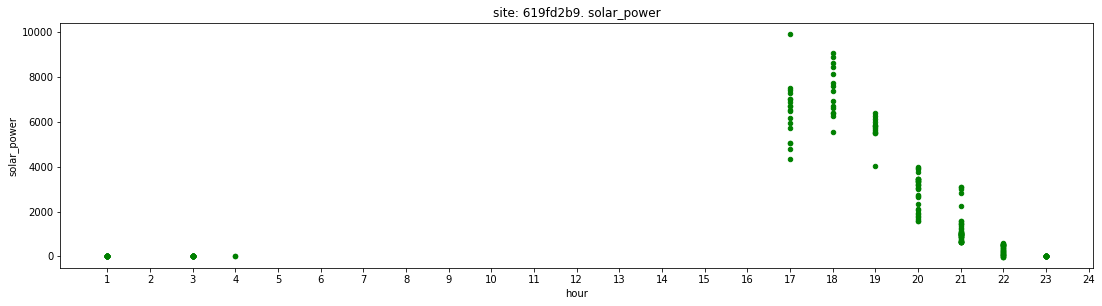

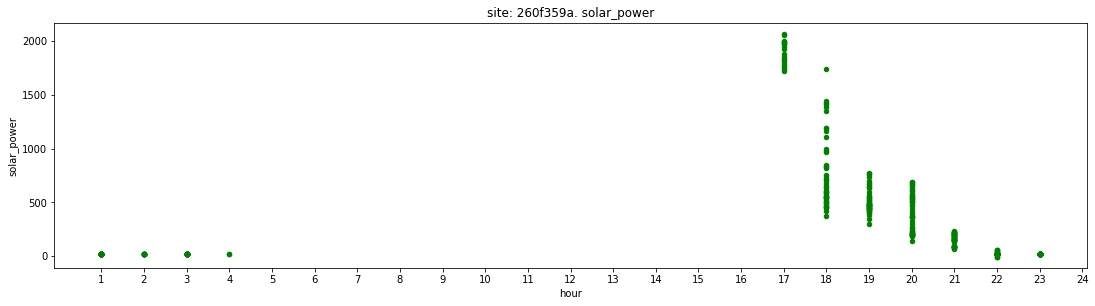

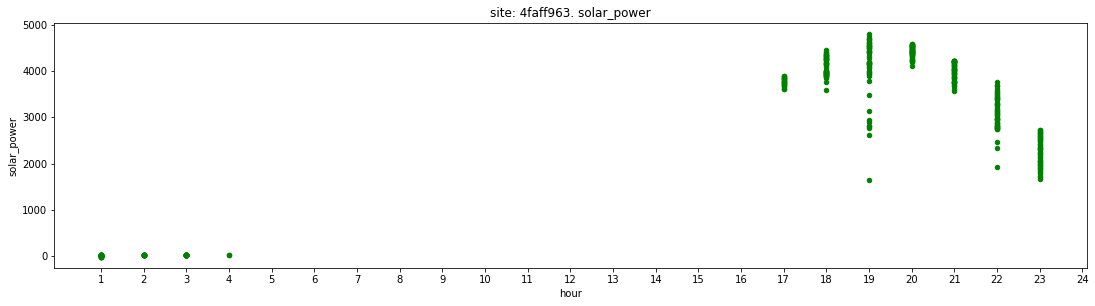

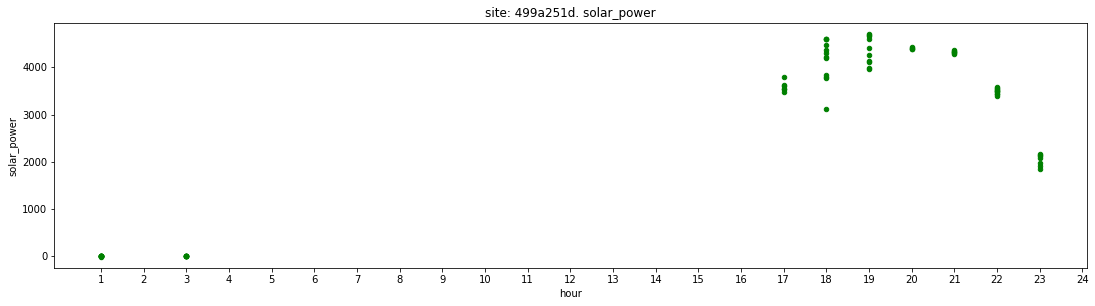

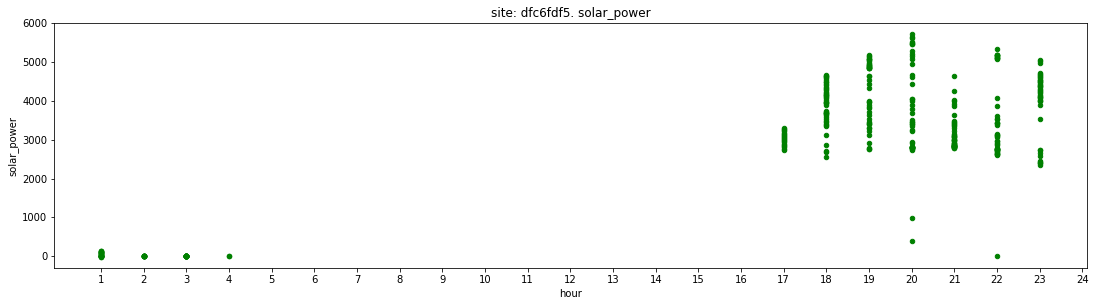

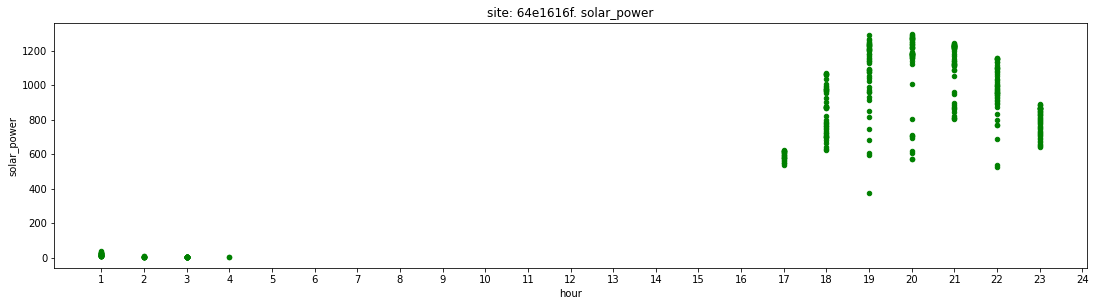

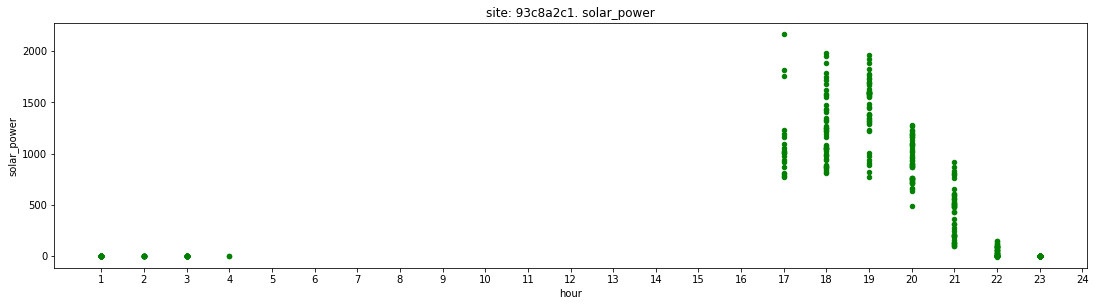

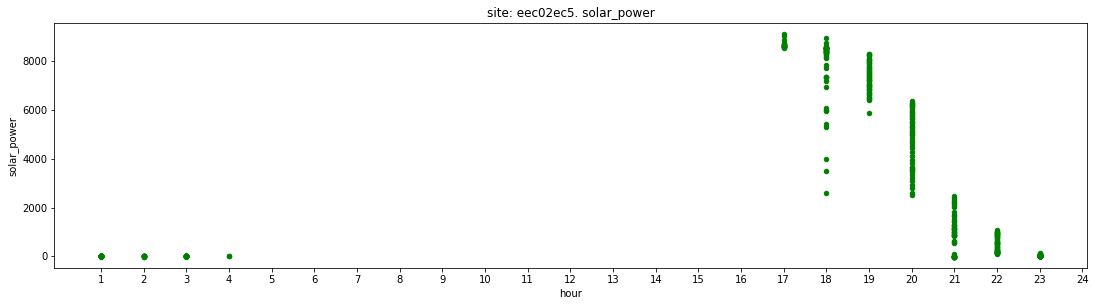

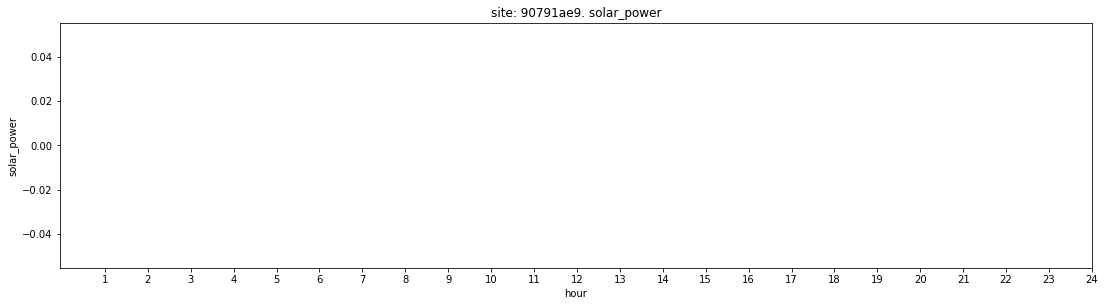

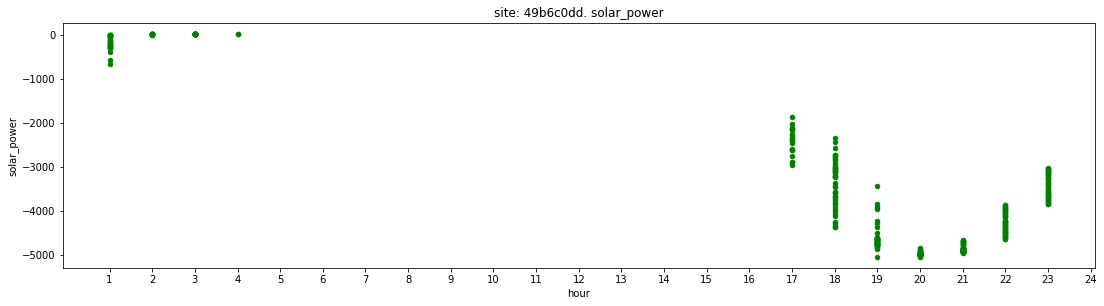

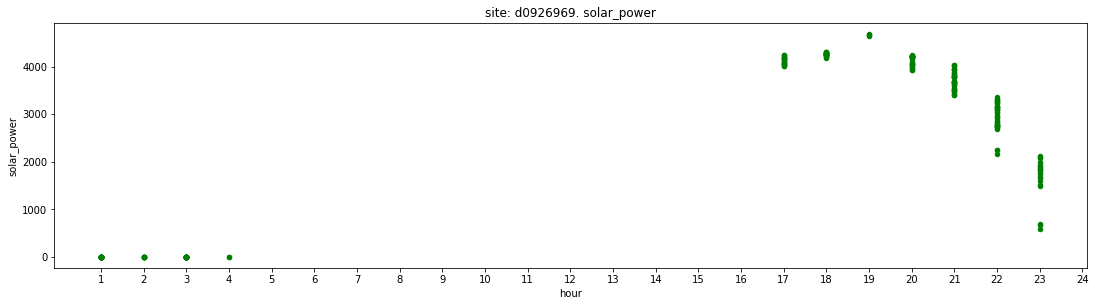

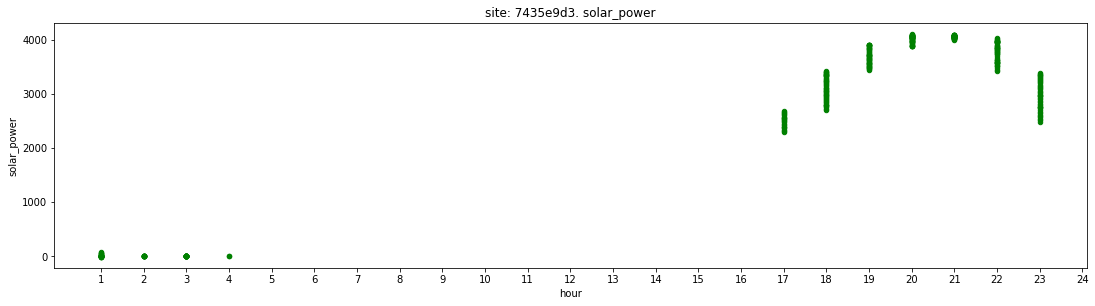

In [319]:
# plot the data
powers =["battery_power", "site_power", "solar_power"]
for s in sites:
    #for p in powers:
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 4.5)
    site_data = data[data.site == s  ]
    #site_data.plot(kind='scatter',x='hour',y="battery_power", color='blue', ax=ax)
    #site_data.plot(kind='scatter',x='hour',y="site_power", color='purple', ax=ax)
    site_data.plot(kind='scatter',x='hour',y="solar_power", color='green', ax=ax)
    plt.title('site: '+s+". "+p)
    plt.xticks(range(1,25))
    plt.show()

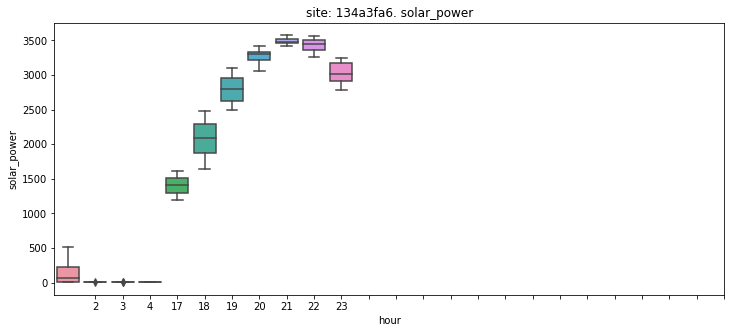

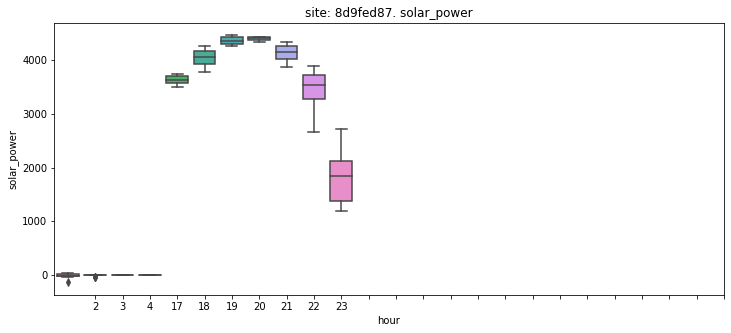

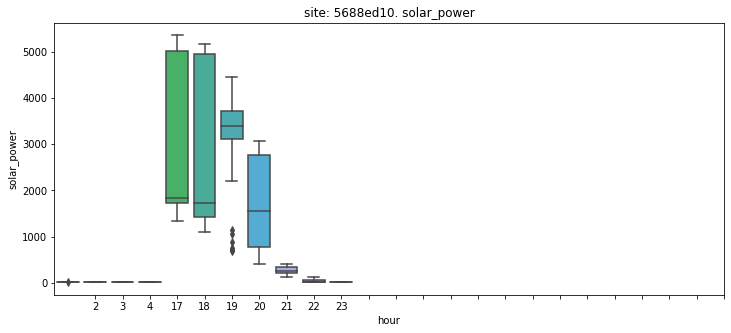

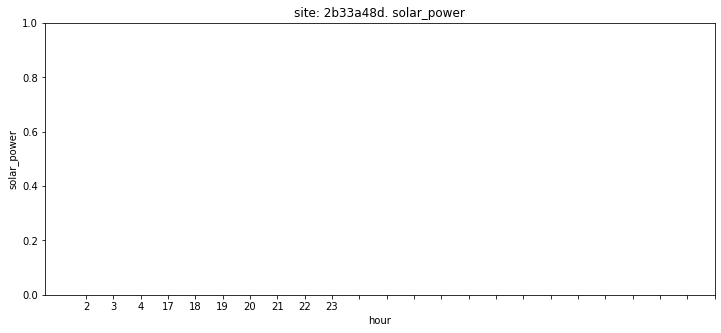

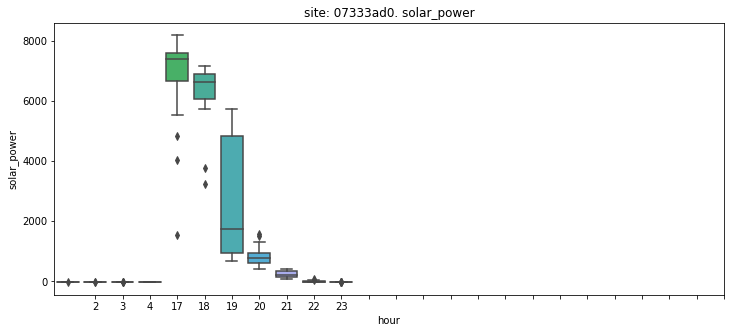

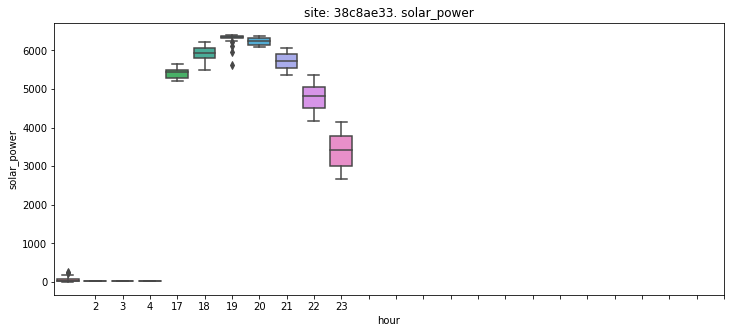

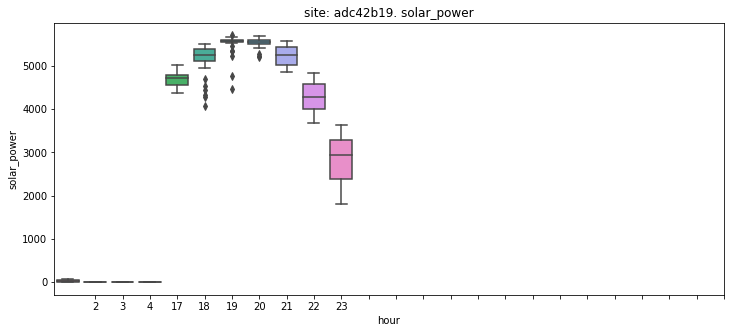

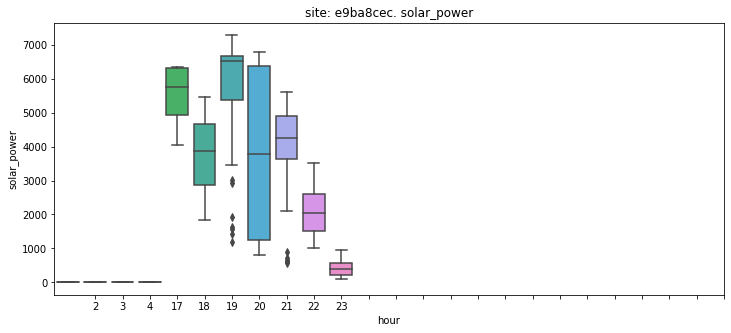

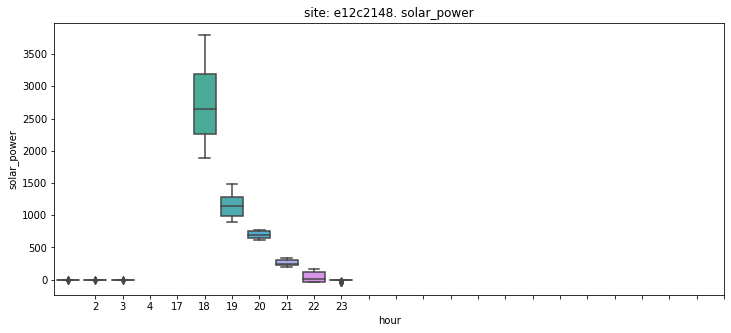

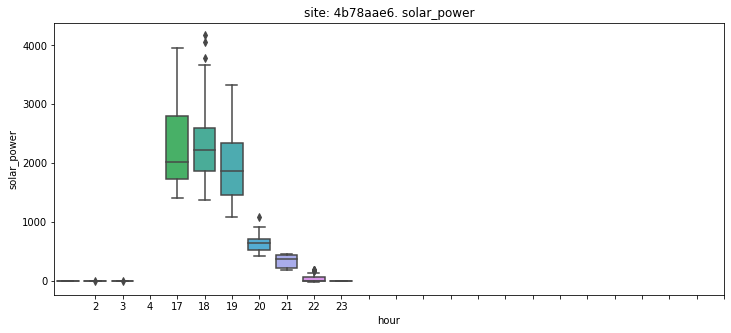

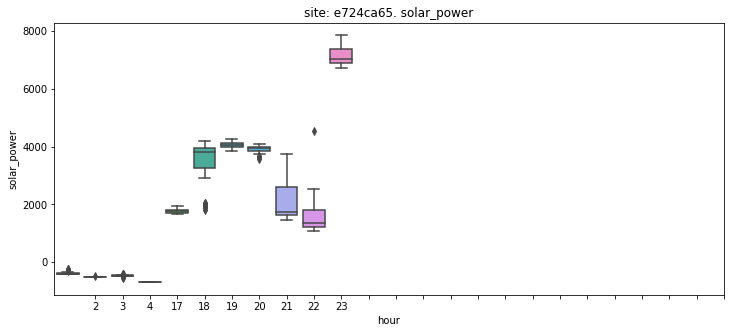

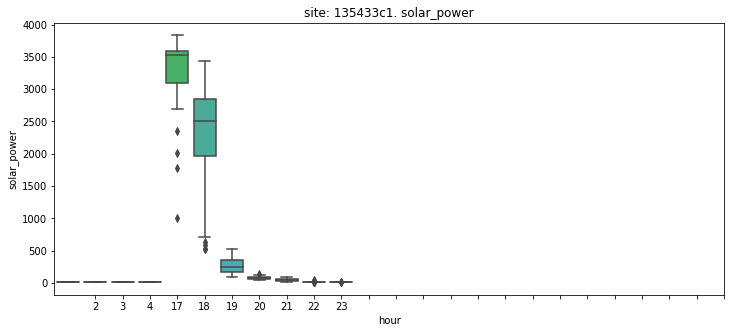

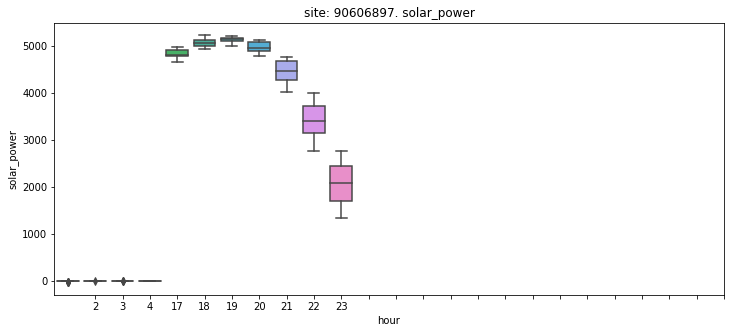

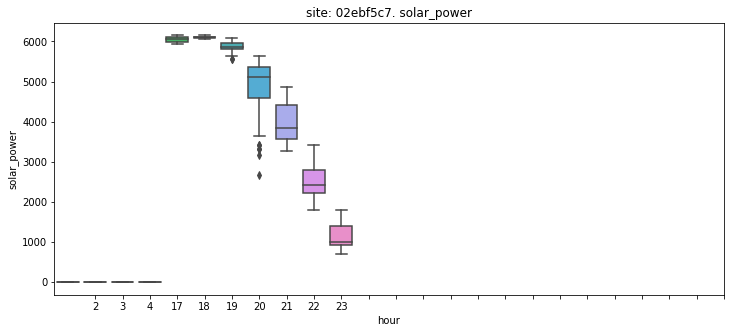

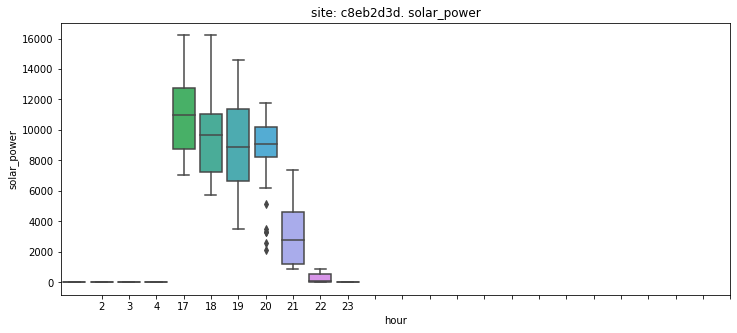

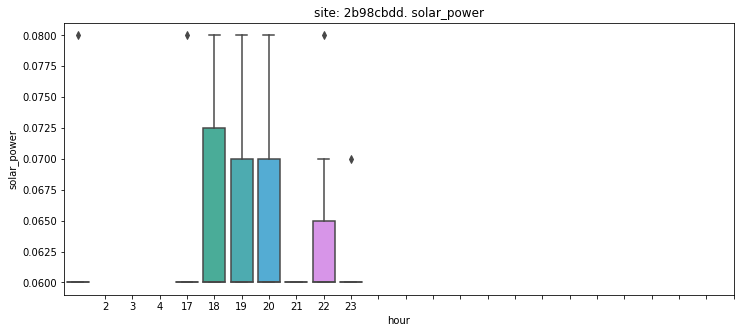

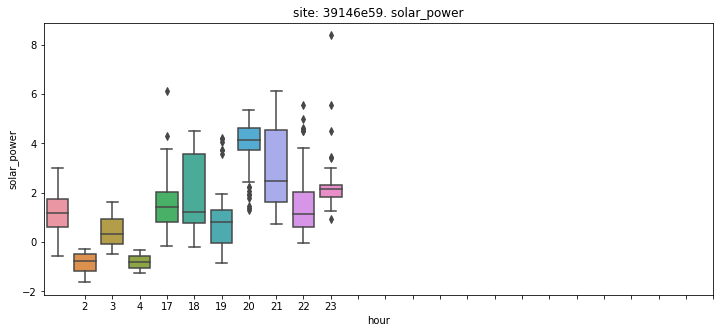

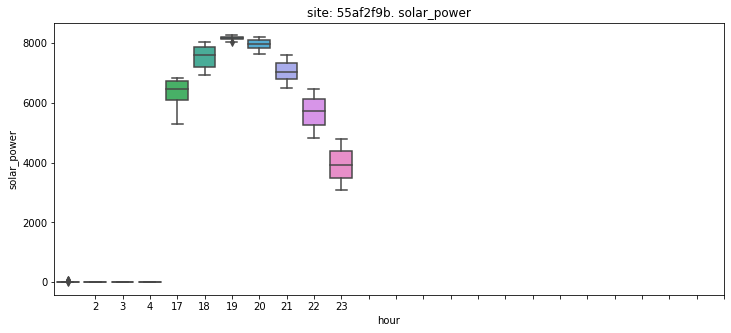

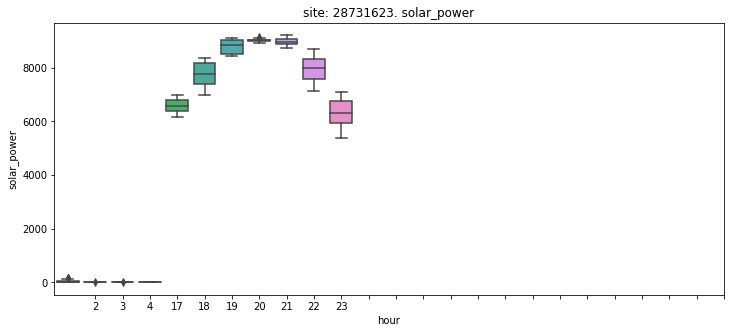

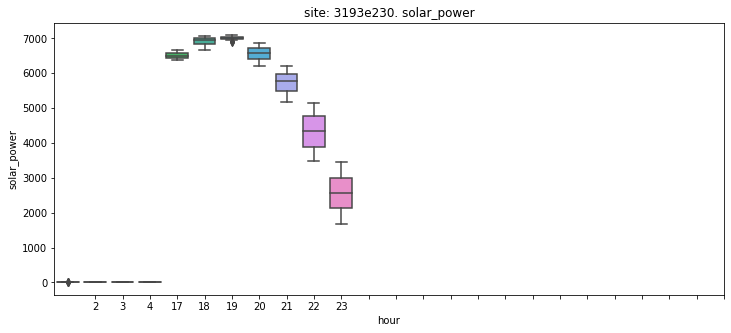

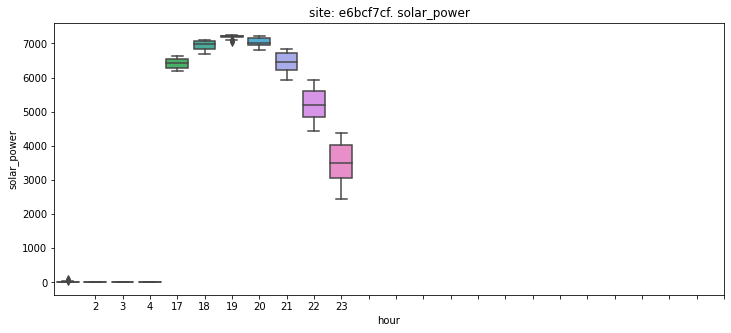

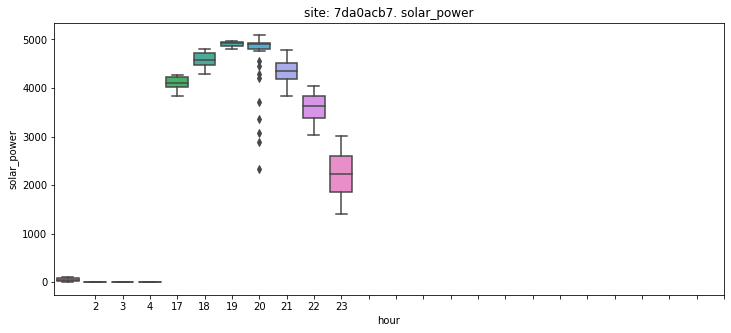

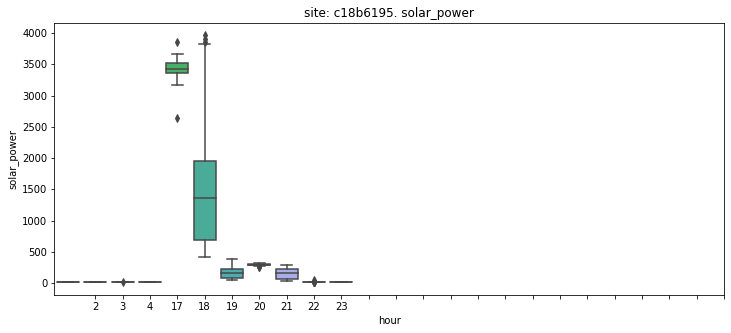

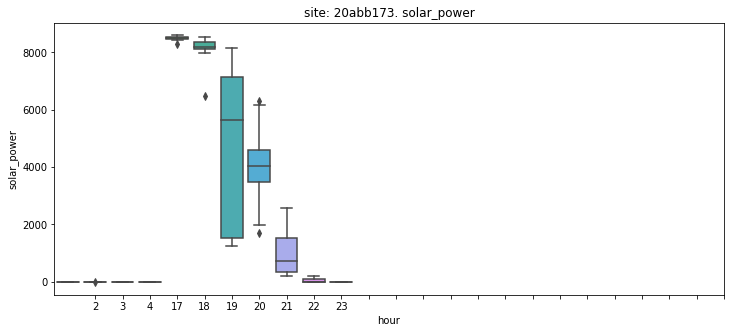

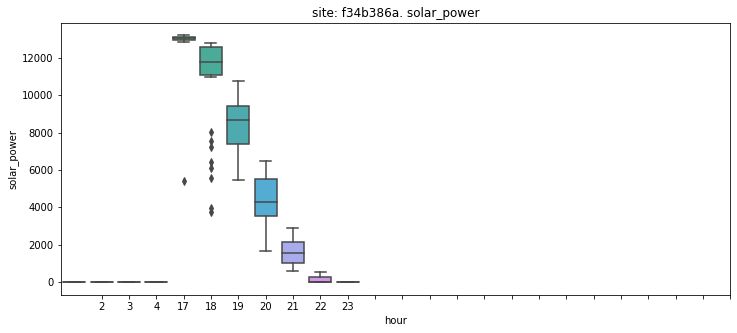

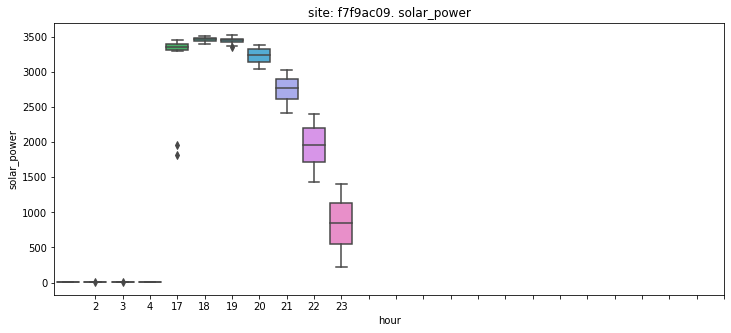

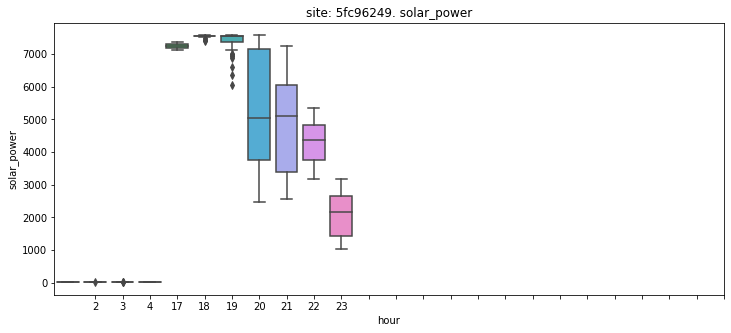

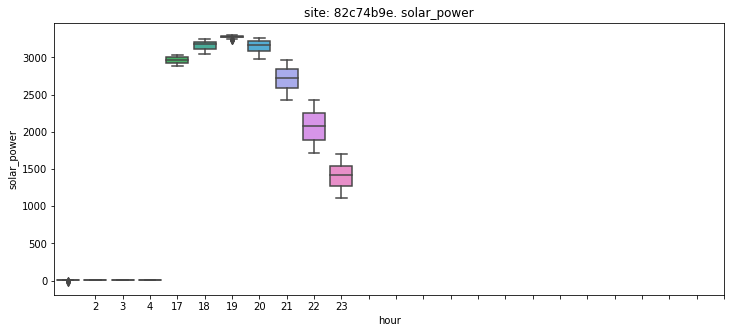

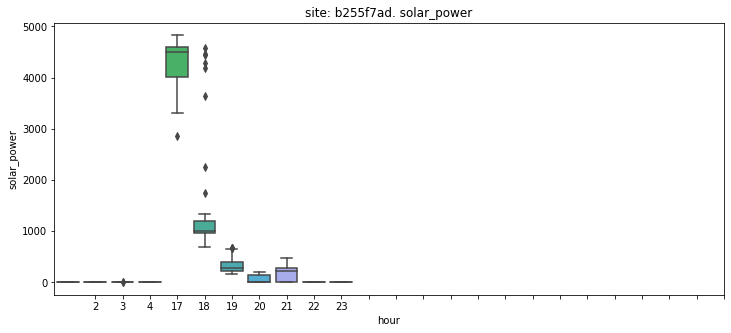

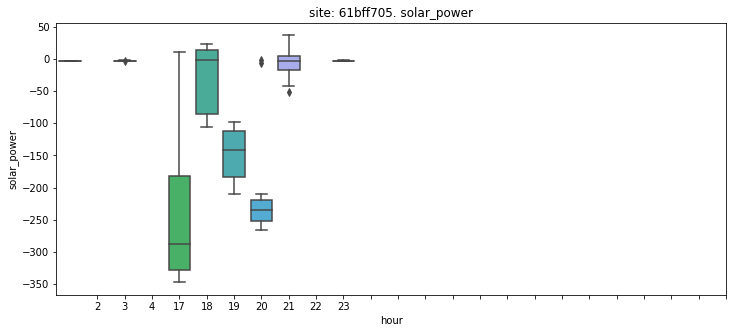

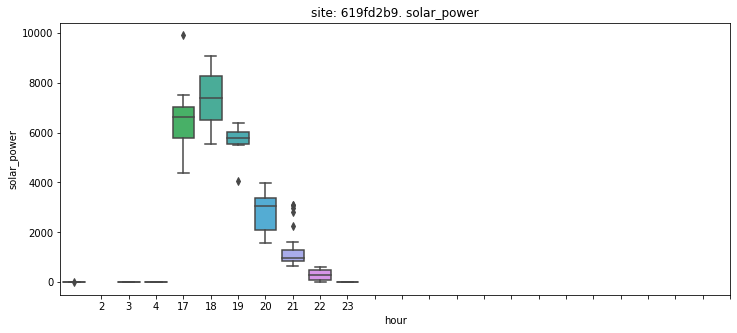

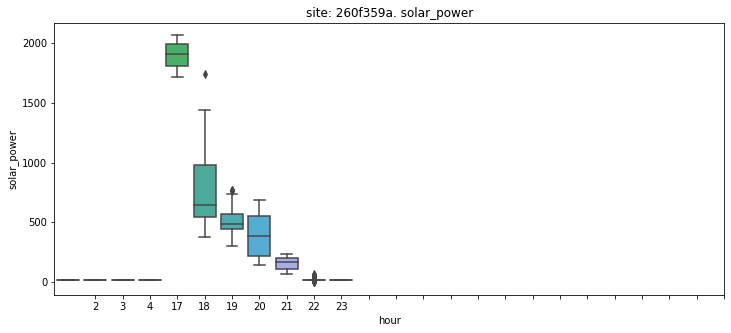

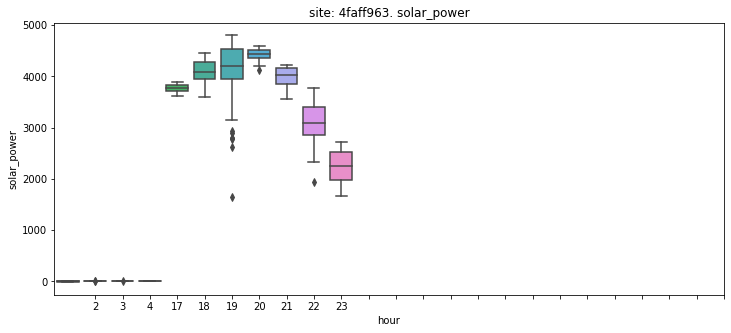

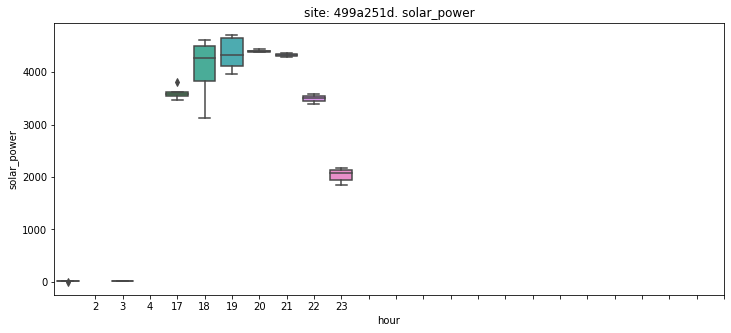

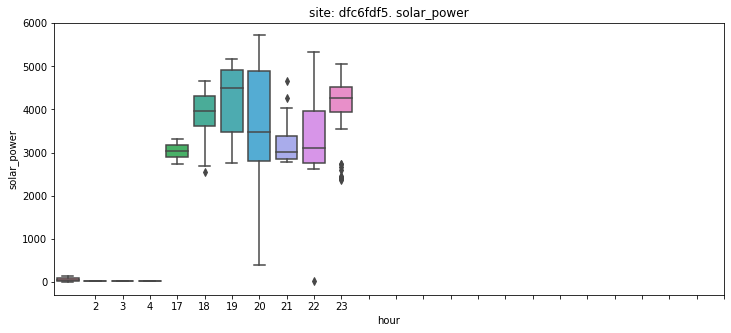

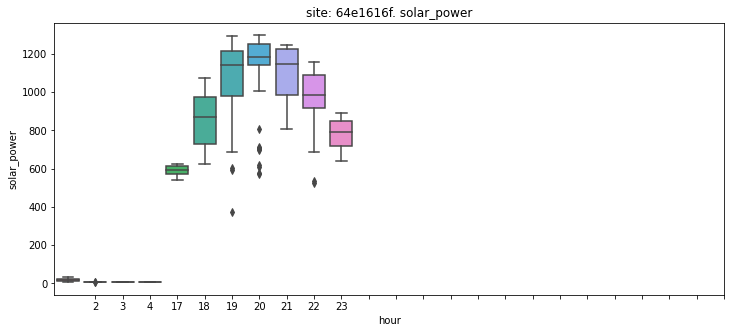

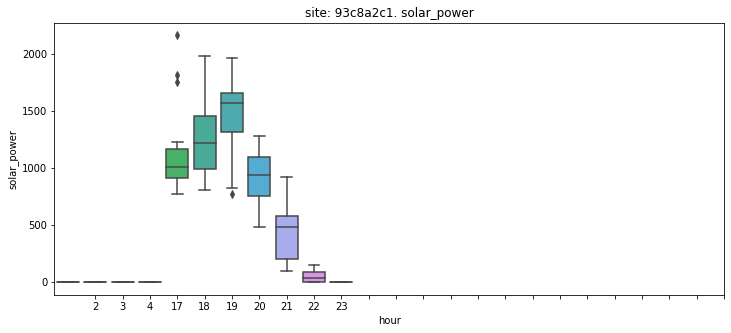

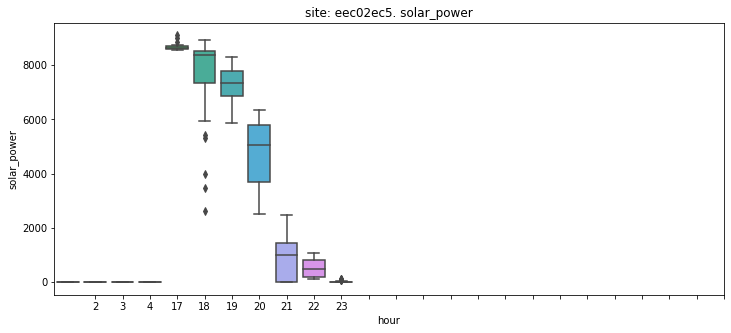

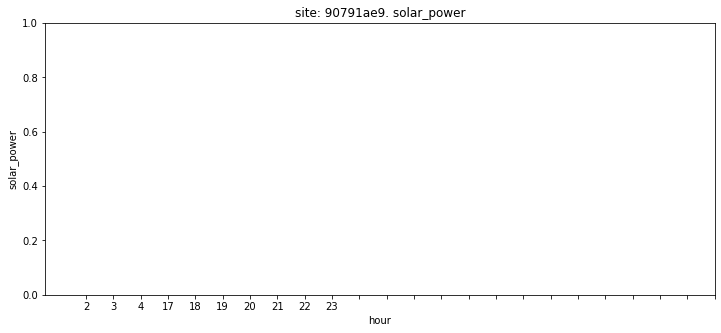

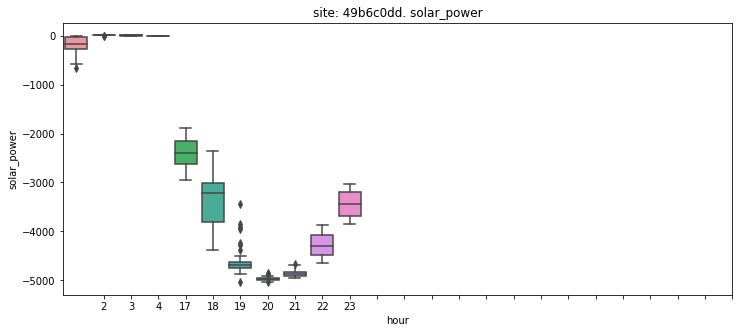

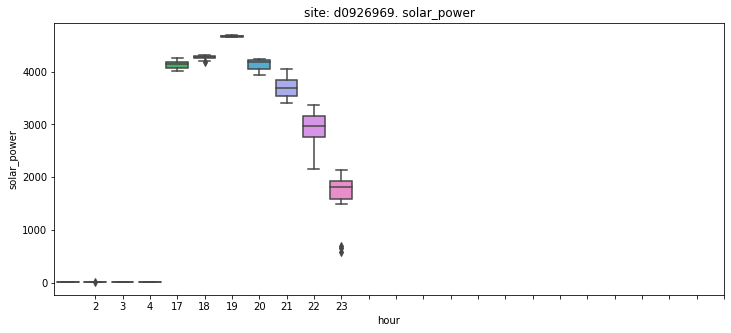

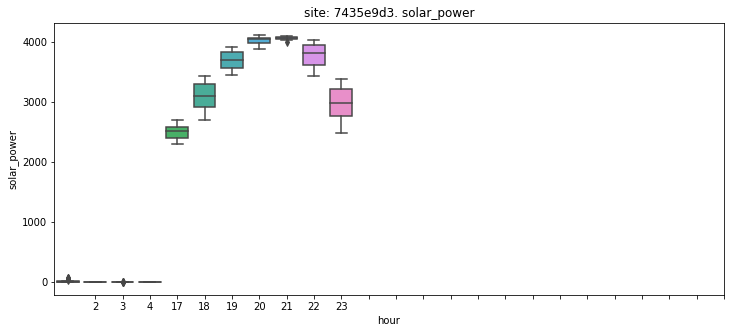

In [320]:
for s in sites:
    site_data = data[data.site == s  ]
    fig, ax = plt.subplots(figsize=(12,5))
    sns.boxplot(y=site_data["solar_power"], x=site_data["hour"])
    plt.title('site: '+s+". "+p)
    plt.xticks(range(1,25))
    plt.show()

In [275]:
q1 = pd.DataFrame(data).quantile(0.25)[0]
q3 = pd.DataFrame(data).quantile(0.75)[0]
#iqr = q3 - q1 #Interquartile range
#fence_low = q1 - (1.5*iqr)
#fence_high = q3 + (1.5*iqr)
print(q1)
print(q3)

-13.0
5.33
